In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as  np
from scipy import fft
# from training_model import extract_features_from_entry

WINDOW_SIZE = 150
NUM_OF_SENSORS = 2
OVERLAP = int(WINDOW_SIZE / 2)
THRESHOLD = 220

In [ ]:
csv_file = pd.read_csv('data2.csv')
N = int(csv_file.shape[0])
Fs = 100
frequencies_hz = np.fft.fftfreq(N, 1/Fs)[:N//2 + 1]

emg = csv_file.iloc[:, 1]
frequencies_hz.size

In [ ]:
plt.plot(emg)

In [ ]:
X = abs(fft.fft(emg))[0:int(N/2) + 1]

plt.stem(frequencies_hz, X)

(5000, 2)
(2, 150)
2426


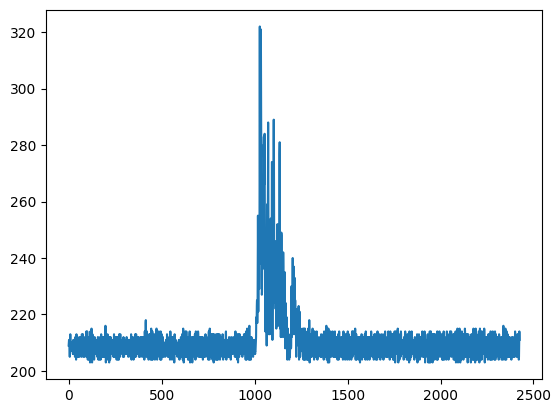

In [22]:
emg = pd.read_csv('./entries/3_emg_1.csv')
emg = emg.iloc[:, 1:]

c = 0
first = True
values = np.zeros((NUM_OF_SENSORS, WINDOW_SIZE))

l = []


emg_raw = np.zeros((NUM_OF_SENSORS, WINDOW_SIZE))

print(emg.shape)
print(emg_raw.shape)


for _, row in emg.iterrows():
    emg_raw[:, c] = row

    if (c == WINDOW_SIZE - 1 and first) or (c == OVERLAP + 1 and not first):
        c = OVERLAP
        first = False

        # print(emg_raw)

        emg_raw = np.roll(emg_raw, OVERLAP, axis=1)
        wl = np.sum(np.abs(np.abs(emg_raw[0, :])))
        
        l.append(wl)
        
    else:
        c = c + 1

print(len(l))
plt.plot(l)

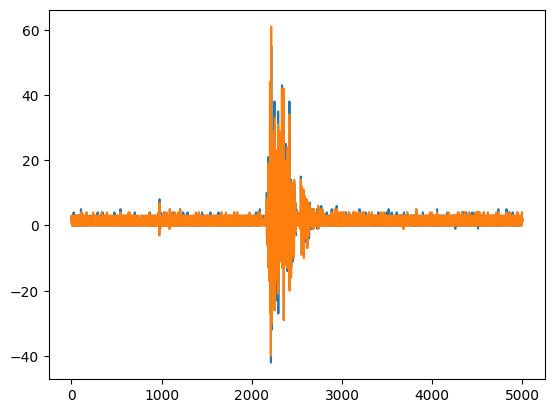

In [23]:
plt.plot(emg)